#Lab Assignment - 1

---



---


##ID3-A, CART and K-Means Forest
####Nilay Naharas - 2019uee0112
####Saurabh Suman - 2019uee0132

In [ ]:
#importing useful libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading the data
visitor_data = pd.read_csv("/content/changes-visitors-covid.csv")
covid_data = pd.read_csv("/content/owid-covid-data.csv")

## Preprocessing and Visualization of Dataset

In [ ]:
visitor_data.head()

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,Afghanistan,AFG,2020-02-17,0.00,4.000,1.333,5.667,1.000,-6.333
1,Afghanistan,AFG,2020-02-18,0.75,4.250,0.750,6.500,1.500,-3.250
2,Afghanistan,AFG,2020-02-19,0.40,4.000,0.800,5.200,1.400,-1.600
3,Afghanistan,AFG,2020-02-20,0.00,3.833,0.833,5.000,1.000,-0.333
4,Afghanistan,AFG,2020-02-21,0.00,4.571,0.714,5.286,1.429,0.571


In [ ]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
len(visitor_data)

61950

In [ ]:
len(covid_data)

93331

In [ ]:
visitor_data.isna().sum()          # checking Null values

Entity                      0
Code                        0
Day                         0
retail_and_recreation    1100
grocery_and_pharmacy     1075
residential              1364
transit_stations          878
parks                    1059
workplaces                 41
dtype: int64

In [ ]:
covid_data.isna().sum()           # checking null values

iso_code                                     0
continent                                 4421
location                                     0
date                                         0
total_cases                               2973
new_cases                                 2975
new_cases_smoothed                        3987
total_deaths                             12912
new_deaths                               12755
new_deaths_smoothed                       3987
total_cases_per_million                   3457
new_cases_per_million                     3458
new_cases_smoothed_per_million            4465
total_deaths_per_million                 13383
new_deaths_per_million                   13225
new_deaths_smoothed_per_million           4465
reproduction_rate                        18124
icu_patients                             83837
icu_patients_per_million                 83837
hosp_patients                            81541
hosp_patients_per_million                81541
weekly_icu_ad

In [ ]:
ind_visitors = visitor_data[visitor_data["Code"]=="IND"]        # Taking India for our analysis

In [ ]:
ind_visitors.isna().sum()

Entity                   0
Code                     0
Day                      0
retail_and_recreation    0
grocery_and_pharmacy     0
residential              0
transit_stations         0
parks                    0
workplaces               0
dtype: int64

In [ ]:
ind_covid = covid_data[covid_data["iso_code"]=="IND"]        # Taking India for our Ananlysis

In [ ]:
ind_covid.isna().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         46
icu_patients                             491
icu_patients_per_million                 491
hosp_patients                            491
hosp_patients_per_million                491
weekly_icu_admissions                    491
weekly_icu

In [ ]:
# Taking the attributes which were to be taken as per Assignment
ind_covid_data = ind_covid.loc[:,['iso_code','continent','location','date','new_cases']]

In [ ]:
ind_covid_data.isna().sum()

iso_code     0
continent    0
location     0
date         0
new_cases    0
dtype: int64

In [ ]:
ind_covid_data["Code"] = ind_covid_data["iso_code"]

In [ ]:
ind_covid_data.drop(columns="iso_code",inplace = True)

In [ ]:
ind_visitors = ind_visitors.reset_index(drop = True)         # Resetting Index
ind_covid_data = ind_covid_data.reset_index(drop = True)

In [ ]:
ind_covid_data.head()

,continent,location,date,new_cases,Code
0,Asia,India,2020-01-30,1.0,IND
1,Asia,India,2020-01-31,0.0,IND
2,Asia,India,2020-02-01,0.0,IND
3,Asia,India,2020-02-02,1.0,IND
4,Asia,India,2020-02-03,1.0,IND


In [ ]:
ind_visitors.head()

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
1,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
2,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
3,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
4,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143


In [ ]:
print(len(ind_visitors),len(ind_covid_data))

471 491


In [ ]:
# merged both the data on basis of date 
merged_data = pd.merge(ind_covid_data,ind_visitors,left_on="date",right_on = "Day")

In [ ]:
merged_data.head(25)

,continent,location,date,new_cases,Code_x,Entity,Code_y,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,Asia,India,2020-02-17,0.0,IND,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
1,Asia,India,2020-02-18,0.0,IND,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
2,Asia,India,2020-02-19,0.0,IND,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
3,Asia,India,2020-02-20,0.0,IND,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
4,Asia,India,2020-02-21,0.0,IND,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143
5,Asia,India,2020-02-22,0.0,IND,India,IND,2020-02-22,-0.571,1.143,0.857,0.714,3.714,-0.857
6,Asia,India,2020-02-23,0.0,IND,India,IND,2020-02-23,-1.143,0.714,1.000,0.429,3.429,-0.571
7,Asia,India,2020-02-24,0.0,IND,India,IND,2020-02-24,-1.143,0.571,1.000,0.429,3.286,-0.571
8,Asia,India,2020-02-25,0.0,IND,India,IND,2020-02-25,-1.286,0.000,1.000,0.286,3.143,-0.857
9,Asia,India,2020-02-26,0.0,IND,India,IND,2020-02-26,-1.286,-0.286,0.714,0.571,3.143,-1.000


In [ ]:
# Encoding date seperately for Month and Day
months = []
days = []
for i in range(len(merged_data)):
  months.append(int(merged_data.iloc[i,2].split("-")[1]))
  days.append(int(merged_data.iloc[i,2].split("-")[2]))

In [ ]:
merged_data["Months"] = months
merged_data["Days"] = days

In [ ]:
merged_data.drop(columns = ["continent","location","date","Code_x","Code_y","Day","Entity"],inplace  = True)

In [ ]:
len(merged_data)

471

In [ ]:
merged_data.head()             # Final preprocessed Data

,new_cases,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Months,Days
0,0.0,0.667,1.667,0.000,2.000,3.000,3.000,2,17
1,0.0,0.500,1.750,0.000,2.000,3.250,3.000,2,18
2,0.0,0.400,1.800,0.200,1.800,2.800,3.200,2,19
3,0.0,0.500,2.000,0.000,2.333,3.167,3.333,2,20
4,0.0,-0.143,1.714,0.714,1.429,3.571,0.143,2,21


In [ ]:
main_data = merged_data.drop(columns = "new_cases")

In [ ]:
main_data["new_cases"] = merged_data["new_cases"]

In [ ]:
main_data.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Months,Days,new_cases
0,0.667,1.667,0.000,2.000,3.000,3.000,2,17,0.0
1,0.500,1.750,0.000,2.000,3.250,3.000,2,18,0.0
2,0.400,1.800,0.200,1.800,2.800,3.200,2,19,0.0
3,0.500,2.000,0.000,2.333,3.167,3.333,2,20,0.0
4,-0.143,1.714,0.714,1.429,3.571,0.143,2,21,0.0


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   new_cases              471 non-null    float64
 1   retail_and_recreation  471 non-null    float64
 2   grocery_and_pharmacy   471 non-null    float64
 3   residential            471 non-null    float64
 4   transit_stations       471 non-null    float64
 5   parks                  471 non-null    float64
 6   workplaces             471 non-null    float64
 7   Months                 471 non-null    int64  
 8   Days                   471 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 36.8 KB


###Node class
In this class we define basic variables for each node in the tree. This first five variables are for meant for decision nodes and the last one is meant for the leaf node.

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

###Decision Tree
In this class we define the methods for building the tree, getting the best split out of all the attributes, splitting the tree, fitting the model to the given data, printing the tree after splitting and predicting values for new data points.

In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        #recursive function to build the tree
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        #function to find the best split

        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        #function to split the data 
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        #function to compute variance reduction
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        #function to compute leaf node
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        #function to print the tree
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        #function to train the tree
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        #function to predict new dataset
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        #function to predict a single data point
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions


In [ ]:
# To split the data into train and test
def train_test_split(X, y, train_size):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, train_size)

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    print(len(X_train), len(y_train), len(X_test), len(y_test))
    return X_train, y_train, X_test, y_test

In [ ]:
X = merged_data.drop(columns = "new_cases").values
Y = merged_data.loc[:, "new_cases"].values.reshape(-1,1)
print(X.shape,Y.shape)
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, 80)

(471, 8) (471, 1)
376 376 95 95


In [ ]:
# Running Decision Tree on our Dataset
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_6 <= 3.0 ? 687656218.1000595
 left:X_1 <= 8.857 ? 118529095.81718338
  left:X_6 <= 1.0 ? 35571807.53419408
    left:X_1 <= 8.286 ? 13475120.728414439
        left:14253.538461538461
        right:0.0
    right:X_0 <= -25.857 ? 2030.8343197278914
        left:115.875
        right:8.555555555555555
  right:X_6 <= 2.0 ? 122064682.25807479
    left:X_1 <= 10.0 ? 19968611.255282693
        left:24827.833333333332
        right:13517.12
    right:X_7 <= 17.0 ? 265920952.34076923
        left:22263.46153846154
        right:54903.75
 right:X_4 <= -49.0 ? 2218284011.0946836
  left:X_6 <= 6.0 ? 486833169.15036565
    left:X_0 <= -71.286 ? 24233424.870693825
        left:2660.6938775510203
        right:12846.724137931034
    right:X_6 <= 7.0 ? 230834602.88896874
        left:35210.217391304344
        right:65694.4074074074
  right:X_2 <= 16.0 ? 9084693929.147352
    left:X_6 <= 4.0 ? 1413125379.5191636
        left:163904.4
        right:53527.83505154639
    right:X_3 <= -47.0 ? 4542005091

In [ ]:
# Mean Squared Error
def MSE(Y, YH):
  return np.square(Y - YH).mean()

In [ ]:
Y_pred = regressor.predict(X_test) 
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))
print(np.sqrt(MSE(Y_test,Y_pred)))


39482.597270861006
144010.35071649784


In [ ]:
# Helper functions for CART and ID3a

def weightedAvg(v,c):
    N = len(v)
    s = 0
    s1 = 0
    for i in range(N):
        s = s + v[i]*c[i]
    for i in c:
        s1 = s1 + i
    return s/s1

def extractTable(T,val,index):
    R = len(T)
    C = len(T[0])
    subtable = []
    for i in range(R):
        if T[i][index] == val:
            newRow = []
            for j in range(C):
                if j != index:
                    newRow.append(T[i][j])
            subtable.append(newRow)
    return subtable

def extractColumn(T,index):
    R = len(T)
    col = []
    for i in range(R):
        col.append(T[i][index])
    return col

def normalAvg(x):
    N = len(x)
    s = 0
    for i in range(N):
        s = s + x[i]
    return s/N

def varianceData(x):
    u = normalAvg(x)
    N = len(x)
    s = 0
    for i in range(N):
        s = s + (x[i]-u)*(x[i]-u)
    return s/N

def stdDeviation(x):
    return math.sqrt(varianceData(x))

def removeItem(List,index):
    tmp = []
    for i in range(len(List)):
        if index != i:
            tmp.append(List[i])
    return tmp
    
def recursiveCall_(T,testData):
    # print("Table = ",T)
    R = len(T)
    C = len(T[0])
    if C <= 2:
        # print("base case... terminating!!!")
        # print("Base Case Table = " ,T)
        # print("Test Data = ", testData)
        res = normalAvg(extractColumn(T,C-1))
        error = abs(res - testData[len(testData)-1])
        # print("by avg")
        return res,error
    else:
        target = extractColumn(T,C-1)
        stdParent = stdDeviation(target)
        # print("Parent Std = ",stdParent)
        mx = -9999
        mxIndex = -1
        for j in range(C-1):
            # print("Column Comparison = ",j)
            uniqueClass = np.unique(extractColumn(T,j))
            # print(uniqueClass)
            lstOfStd = []
            lstOfCnt = []
            for val in uniqueClass:
                # print("Unique Val = ",val)
                subtable = extractTable(T,val,j)
                #print("Subtable = ",subtable,"index and Val ",j,val)
                lst = extractColumn(subtable,len(subtable[0])-1)
                #print("List = ",lst)
                stdChild = (stdDeviation(lst))
                lstOfStd.append(stdChild)
                lstOfCnt.append(len(lst))
            wt = weightedAvg(lstOfStd,lstOfCnt)
            diff = stdParent - wt
            # print("Difference = ", diff)
            if mx < diff:
                mx = diff
                mxIndex = j
        # print("SplittingMaxIndex = ",mxIndex)
        newTestData = removeItem(testData,mxIndex)
        uniqueClass = np.unique(extractColumn(T,mxIndex))
        flag = 0
        for val in uniqueClass:
            if testData[mxIndex] == val:
                flag = 1
                t = extractTable(T,val,mxIndex)
                # print("recursiveCall...")
                return recursiveCall_(t,newTestData)
        if flag == 0:
            res = normalAvg(extractColumn(T,len(T[0])-1))
            # print("Test Data = ", testData)
            error = abs(res - testData[len(testData)-1])
            return res,error
            
def id3a_main(T):
    ROWS = len(T)
    print(ROWS)
    res = []
    print("----------------------------------------------------------")
    acc_error = 0
    rmse = []
    for i in T:
        yy = (recursiveCall_(T,i))
        acc_error = acc_error + (yy[1])*(yy[1])
        acc_error =  acc_error/2
        rmse.append(math.sqrt(acc_error))
    rmseAvg = normalAvg(rmse)
    # print("RMSE  = ",math.sqrt(acc_error))
    print("-----------------------------------------------------------")
    for i in T:
        res.append((recursiveCall_(T,i)))
    return res, rmseAvg

print(id3a_main(np.array(main_data)))




471
----------------------------------------------------------
-----------------------------------------------------------
([(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (2.0, 0.0), (0.0, 0.0), (23.0, 0.0), (2.0, 0.0), (1.0, 0.0), (3.0, 0.0), (5.0, 0.0), (4.0, 0.0), (13.0, 0.0), (6.0, 0.0), (11.0, 0.0), (9.0, 0.0), (20.0, 0.0), (11.0, 0.0), (6.0, 0.0), (23.0, 0.0), (14.0, 0.0), (38.0, 0.0), (50.0, 0.0), (86.0, 0.0), (66.0, 0.0), (103.0, 0.0), (37.0, 0.0), (121.0, 0.0), (70.0, 0.0), (160.0, 0.0), (100.0, 0.0), (37.0, 0.0), (227.0, 0.0), (146.0, 0.0), (601.0, 0.0), (545.0, 0.0), (24.0, 0.0), (515.0, 0.0), (506.0, 0.0), (1190.0, 0.0), (533.0, 0.0), (605.0, 0.0), (809.0, 0.0), (873.0, 0.0), (848.0, 0.0), (759.0, 0.0), (1248.0, 0.0), (1034.0, 0.0), (835.0, 0.0), (1108.0, 0.0), (922.0, 0.0), (1370.0, 0.0), (1893.0, 0.0), (924.0, 0.0), (1541.0, 0.0), (1290.0, 0.0), (1707.

In [ ]:
np.array(main_data).shape

(471, 9)

----------------------------------------------------------
RMSE  =  372232.7787485687
-----------------------------------------------------------
[37.0, 121.0, 70.0, 160.0, 121.33333333333333, 121.33333333333333, 121.33333333333333, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 727.8333333333334, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 1887.3529411764705, 3577.0, 3577.0, 3577.0, 3577.0, 3577.0, 3577.0, 3577.0, 3577.0, 3577.0, 3577.0, 3577.

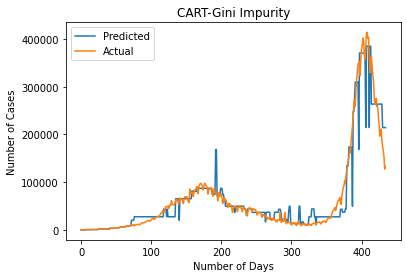

In [ ]:
def cntElementClass(T,index):# [0,1,4,1,4] == > [0,1,4]
    res = []# [[0,1],[1,2],[4,2]]
    List = extractColumn(T,index) # [0,1,4,1,4], [0,1,4][1, 2, 2]
    res, count = np.unique(extractColumn(T,index), return_counts = True )# [0,1,4]
    numElements = len(List)
    return res, numElements, count

def giniImpurity(x):# [3,1,2]==> P(i)*(1-P(i))
    s = 0
    N = len(x)
    total = normalAvg(x)*N
    for i in range(len(x)):
        s = s + (x[i]/total)*(1-(x[i]/total))
    return s

def entropy(x):# -SUM(p log(p))
    s = 0
    N = len(x)
    total = normalAvg(x)*N
    for i in range(len(x)):
        if x[i] != 0:
            s = s + (x[i]/total)*math.log2(x[i]/total)
    return -s

def recursiveCall(T,testData):
    # print("Table = ",T)
    R = len(T)
    C = len(T[0])
    if C <= 2:
        # print("base case... terminating!!!")
        # print("Base Case Table = " ,T)
        # print("Test Data = ", testData)
        res = normalAvg(extractColumn(T,C-1))
        error = abs(res - testData[len(testData)-1])
        # print("by avg")
        return res,error
    else:
#        y = cntElementClass(T,C-1)
#        parentGini = giniImpurity(y[2])
#        print("Parent Std = ",parentGini)
        mn = 99999
        mnIndex = -1
        for j in range(C-1):
            y = cntElementClass(T,j)
            childGini = giniImpurity(y[2])
            if childGini < mn:
                mn = childGini
                mnIndex = j
        # print("SplittingMaxIndex = ",mxIndex)
        newTestData = removeItem(testData,mnIndex)
        uniqueClass = np.unique(extractColumn(T,mnIndex))
        flag = 0
        for val in uniqueClass:
            if testData[mnIndex] == val:
                flag = 1
                t = extractTable(T,val,mnIndex)
                # print("recursiveCall...")
                return recursiveCall(t,newTestData)
        if flag == 0:
            res = normalAvg(extractColumn(T,len(T[0])-1))
            # print("Test Data = ", testData)
            error = abs(res - testData[len(testData)-1])
            return res,error
            
# file = open("mainTable0.csv")
file = open("covid_updated_file.csv")
T = np.loadtxt(file, delimiter=",")
ROWS = len(T)
# targetValues = np.loadtxt(open("/content/mainTable0.csv", "rb"), delimiter=",", usecols=3)
targetValues = np.loadtxt(open("covid_updated_file.csv", "rb"), delimiter=",", usecols=6)

#targetValues = np.array(main_data.loc[:,"new_cases"])
def CART_main(T):
    ROWS = len(T)
    print(ROWS)
    res = []
    print("----------------------------------------------------------")
    acc_error = 0
    rmse = []
    for i in T:
        yy = (recursiveCall(T,i))
        acc_error = acc_error + (yy[1])*(yy[1])
        acc_error =  acc_error/2
        rmse.append(math.sqrt(acc_error))
    rmseAvg = normalAvg(rmse)
    # print("RMSE  = ",math.sqrt(acc_error))
    print("-----------------------------------------------------------")
    for i in T:
        res.append((recursiveCall(T,i)))
    return res, rmseAvg

#print(T[0][3]) 
#T = [[0,2,1,0,25],[0,2,1,1,30],[1,2,1,0,46],[2,1,1,0,45],[2,0,0,0,52],[2,0,0,1,23],[1,0,0,1,43],[0,1,1,0,35],[0,0,0,0,38],[2,1,0,0,46],[0,1,0,1,48],[1,1,1,1,52],[1,2,0,0,44],[2,1,1,1,30]]
#y = [25, 30, 46, 35, 38, 48]
#print(np.std(y))
print("----------------------------------------------------------")
acc_error = 0
predictions = []
for i in T:
    yy = (recursiveCall(T,i))
    predictions.append(yy)
    acc_error = acc_error + (yy[1])*(yy[1])
acc_error =  acc_error/2
print("RMSE  = ",math.sqrt(acc_error))
print("-----------------------------------------------------------")

s = 0 

# print(targetValues)
#for i in np.array(main_data):
    # print(recursiveCall(T,i))
    
predictedValues = []
for pred, err in predictions:
  predictedValues.append(pred)
print(predictedValues)

plt.plot(predictedValues)
# plt.hold(True)
plt.plot(targetValues)
plt.title("CART-Gini Impurity")
plt.legend(["Predicted","Actual"])
plt.xlabel("Number of Days")
plt.ylabel("Number of Cases")
plt.show()


435
20
----------------------------------------------------------
-----------------------------------------------------------
51
----------------------------------------------------------
-----------------------------------------------------------
33
----------------------------------------------------------
-----------------------------------------------------------
59
----------------------------------------------------------
-----------------------------------------------------------
74
----------------------------------------------------------
-----------------------------------------------------------
38
----------------------------------------------------------
-----------------------------------------------------------
38
----------------------------------------------------------
-----------------------------------------------------------
74
----------------------------------------------------------
-----------------------------------------------------------
22
-----------------

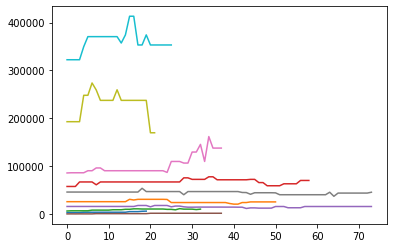

In [ ]:


#[[[1, 2, 4, 5],[5,2,1,7]],[[3,4,1,6]]]
def clusterAvg(x):
    res = []
    for i in range(len(x)):
        res.append(vectorAvg(x[i]))
    return res
    
def normalAvg(x):
    N = len(x)
    s = 0
    for i in range(N):
        s = s + x[i]
    return s/N
    
def vectorAvg(x):
    res = []
    C = len(x[0])
    for i in range(C):
       col = extractColumn(x,i)
       res.append(normalAvg(col))
    return res
    
def extractColumn(T,index):
    R = len(T)
    col = []
    for i in range(R):
        col.append(T[i][index])
    return col
    
def centriod(x,y):#[1,2,3],[4,5,6]
    sx = 0
    N = len(x)
    sy = 0
    for i in range(N):
        sx = sx + x[i]
        sy = sy + y[i]
    return (sx/N,sy/N)

def similarity(x,y):#[1,2,3],[5,6,9]
    s = 0
    for i in range(len(x)):
        s = s + abs(x[i]-y[i])
    return s

def euclideanDistance(x,y):# [1,2,5,3],[2,4,1,6]
    s = 0 
    for i in range(len(x)):
        s = s + (x[i]-y[i])**2
    return np.sqrt(s)
    
def difference(x,y):#[1,2,3],[5,6,9]
    res = []
    for i in range(len(x)):
        res.append(abs(x[i]-y[i]))
    return res


def initCluster(T,k):
    res = []
    for i in range(k):
        res.append(T[i])
    return res
    
def form3DList(n):
    res = []
    for i in range(n):
        row = []
        res.append(row)
    return res

def threshold(x,t):    #[[1,0,4,2],[0,2,1,4]] == > [7,7]
    res = []
    for i in range(len(x)):
        res.append(normalAvg(x[i])*len(x[0]))
    return res 
    
def diffInCentriod(x,y):#[[1,2,4,5],[5,2,1,7]],[[1,2,4,5],[5,2,1,7]]
    res = []
    for i in range(len(x)):
        res.append(difference(x[i],y[i]))
    return res 
    
def addToCluster(newdata,existingdata,clusterId):
    existingdata[clusterId].append(newdata)
    return existingdata

def kMeans(data,centriodCoor,r):# [[1 2 4 5],[5,2,1,7],[3,1,25,1],[4,5,2,1]], centriod k = 2; [[1,2,4,5],[5,2,1,7]]
    k = len(centriodCoor)
    clusters = form3DList(k)
    sampleNumber = len(data)
    for i in range(sampleNumber):
        mn = 99999
        mnIndex = -1
        for j in range(k):#k =2 j =0 ,1
            sim = euclideanDistance(data[i],centriodCoor[j])
            # print("similarity = ",sim)
            if sim < mn:
                mn = sim
                mnIndex = j
            # print("MinIndex = ",mnIndex)
        clusters = addToCluster(data[i],clusters,mnIndex)
    # print("Round = ",r)
    # print(clusters)
    clusterCentriod = clusterAvg(clusters)
    # print("Final Cluster = ",clusterCentriod)
    if r <= 30:
        r = r + 1
        return kMeans(data,clusterCentriod,r) # data: raw data, clusterCentroid, r:iterations (manually set)
    else:
        return [clusterCentriod, clusters]
        # print(clusters)
        # with open("clusters_file.csv","w+") as my_csv:
        #     write = csv.writer(my_csv,delimiter=',')
        #     write.writerows(clusters)
    




    
file = open("covid_updated_file.csv")
T = np.loadtxt(file, delimiter=",")
print(len(T))
# 
#       
# print(form3DList(3)

cent = (initCluster(T,10)) #table data and clusters to create

# # cent = [[27,10,15.66,8.66],[39.25,73,48,19.75],[24.4,73.2,50,76.4]]
# print("Initial Cluster = ",cent)
# print(kMeans(T,cent,0))

cc = kMeans(T, cent, 0)
# print(cc[1][0])
tree = []
for i in range(len(cc[1])):
    a, b = id3a_main(cc[1][i])
    tree.append(a)

print("RMSE Kmeans with ID3 = ",b)

cc = kMeans(T, cent, 0)
# print(cc[1][0])
tree = []
for i in range(len(cc[1])):
    a, b = CART_main(cc[1][i])
    tree.append(a)

print("RMSE Kmeans with CART = ",b)
# print(cc[1])
# day = 1
# for i in range(len(cc[1])):#for each cluster
#     # clt = extractColumn(cc[1][i], len(cc[1][0])-1)
#     for j in range(len(cc[1][0])):# for each point in a cluster
#         predVal = cc[1][i][len(cc[1][i])-1]
#         # plt.plot([day],[predVal],marker=".")
#         day = day + 1



for i in range(len(tree)):
    plt.plot(extractColumn(tree[i],0))
plt.show()

# print("\n\n\n tree:  ", tree)
# print(len(tree))
# print(np.arange(100))
# clstr1 = []
# for i in range(len(cc[1][1])):
#     clstr1.append(cc[1][1][i])

# print("cluster1:  ", clstr1)
# plt.scatter(clstr1, np.arange(len(clstr1)))
# plt.show()
# print("\n\n",len(clstr), len(centr))
# print(euclideanDistance([1,2,3],[1,4,5]))
# print(threshold([[1,0,4,2],[0,2,1,4]]))
# print(difference([1,2,3,4],[5,6,7,8]))
# print(diffInCentriod([[1,2,4,5],[5,2,1,7]],[[4,2,7,5],[9,2,0,1]]))
# print(vectorAvg([[1, 2, 4, 5],[5,2,1,7],[3,4,1,6]]))
# print(clusterAvg([[[1, 2, 4, 5],[5,2,1,7]],[[3,4,1,6]]]))
# print(addToCluster([4,2,1,0],[[]],0))
# print(y[0])
# print(initCluster(T,3))
# print(centriod([1,7,6,5],[3,9,7,5]))
# print(similarity([2,3,4],[5,2,1]))

